# Árboles de decisión Clasificadores

## Noelia Otazo Rojo

### Importamos las librerías necesarias

In [13]:
# Comando para la instalación de las librerías necesarias
#!pip install matplotlib keras tensorflow scikit-learn seaborn pandas plotly

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus # instalar en anaconda, por consola usando: conda install -c conda-forge pydotplus


### Cargamos el dataset y transformamos los datos

In [14]:
# Cargar el dataset de emergencias del 112 en CYL
data = pd.read_csv(".\dataset\Accidentes.csv", encoding="cp1252", sep=";")

# Antes de nada borramos los valores nulos
data_clean=data.dropna()

# Separamos los datos en entrenamiento y prueba.
data_train, data_test = train_test_split(data_clean, test_size=0.3, stratify=data_clean['Tipo Accidente'])

#Transforma los datos a numéricos
#Tipo Accidente
map_target_class = {'Atropello a peatón': 0, 'Colisión lateral y frontolateral': 1, 'Colisión por alcance y múltiple': 2, 'Otro tipo de accidente': 3, 'Salida de la vía': 4, 'Colisión frontal': 5, 'Colisión lateral': 6, 'Vuelco en la calzada': 7}
data_train['TipoAccidente_Numérico'] = data_train['Tipo Accidente'].map(map_target_class)
data_test['TipoAccidente_Numérico'] = data_test['Tipo Accidente'].map(map_target_class)

#Sexo
map_target_sexo = {'Mujer': 0, 'Hombre': 1}
data_train['Sexo_Numérico'] = data_train['Sexo'].map(map_target_sexo)
data_test['Sexo_Numérico'] = data_test['Sexo'].map(map_target_sexo)

#Accesorios de seguridad
map_target_accesorios = {'NINGUNO': 0, 'SE DESCONOCE': 1, 'UTILIZANDO CINTURÓN ': 3, 'SISTEMA DE RETENCIÓN': 4, 'UTILIZANDO CASCO': 5, 'CON REFLECTANTES': 6}
data_train['Accesorios_Numérico'] = data_train['Accesorios de seguridad'].map(map_target_accesorios)
data_test['Accesorios_Numérico'] = data_test['Accesorios de seguridad'].map(map_target_accesorios)

#Tipo de vehículo
map_target_tipo_vehiculo = {'Ambulancia': 0, 'Autobús': 1, 'Bicicleta o triciclo sin motor': 2, 'Camión MMA <= 3500 Kg': 3, 'Camión MMA > 3500 Kg': 4, 'Ciclomotor': 5, 'Desconocido': 6, 'Furgoneta': 7, 'Motocicleta': 8, 'Otros Vehículos': 9, 'Otros vehículos ligeros': 10, 'Turismo': 11, 'Vehículo articulado': 12}
data_train['Vehículo_Numérico'] = data_train['Tipo de vehículo'].map(map_target_tipo_vehiculo)
data_test['Vehículo_Numérico'] = data_test['Tipo de vehículo'].map(map_target_tipo_vehiculo)


# data_train.head(2)

data_train.dropna()
data_test.dropna()

X_train = data_train.drop(['Tipo Accidente', 'Sexo', 'Accesorios de seguridad', 'Tipo de vehículo', 'TipoAccidente_Numérico'], axis=1)
y_train = data_train['TipoAccidente_Numérico']
X_test  = data_test.drop(['Tipo Accidente', 'Sexo', 'Accesorios de seguridad', 'Tipo de vehículo', 'TipoAccidente_Numérico'], axis=1)
y_test  = data_test['TipoAccidente_Numérico']

features_cols = ['Sexo_Numérico', 'Accesorios_Numérico', 'Vehículo_Numérico', 'Muertos', 'Graves', 'Leves', 'Accidentes', 'Victimas'] 
# X serán tus características
X_train = data_train[features_cols]
X_test = data_test[features_cols]

# y será tu variable objetivo
y_train = data_train['TipoAccidente_Numérico']
y_test = data_test['TipoAccidente_Numérico']
# Aplica dropna() mientras X_train y X_test son todavía DataFrames de pandas
X_train = X_train.dropna()
X_test = X_test.dropna()

# Ahora, alinea y_train y y_test con los índices de X_train y X_test después de dropna()
y_train = data_train['TipoAccidente_Numérico'].loc[X_train.index]
y_test = data_test['TipoAccidente_Numérico'].loc[X_test.index]

print(X_train.shape[0] == y_train.shape[0])  # Debería ser True
print(X_test.shape[0] == y_test.shape[0])  # Debería ser True

True
True


### Construcción del modelo del clasificador Árbol de decisión y entrenamiento

In [15]:
classifier = DecisionTreeClassifier()
classifier= classifier.fit(X_train, y_train)

### Predicción de los resultados del clasificador

In [16]:
y_pred = classifier.predict(X_test)

### Evaluación del clasificador

In [17]:
result=confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(result)
print("Classification Report")
print(classification_report(y_test, y_pred))
print("Accuracy: ",accuracy_score(y_test, y_pred))

Confusion Matrix
[[79 16 19  6  1 13  7]
 [13 59 49 34 12 11 14]
 [12 52 57 26 14  9 10]
 [14 43 32 37 20 15 14]
 [ 9 25 27 25 51 30  9]
 [20 20 22 20 27 18 12]
 [11 23 17 11 27 19 19]]
Classification Report
              precision    recall  f1-score   support

           0       0.50      0.56      0.53       141
           1       0.25      0.31      0.27       192
           2       0.26      0.32      0.28       180
           3       0.23      0.21      0.22       175
           4       0.34      0.29      0.31       176
           5       0.16      0.13      0.14       139
           7       0.22      0.15      0.18       127

    accuracy                           0.28      1130
   macro avg       0.28      0.28      0.28      1130
weighted avg       0.28      0.28      0.28      1130

Accuracy:  0.2831858407079646


### Visualización del árbol de decisión utilizado


(process:22304): GLib-GIO-WARNING **: 18:53:41.078: Unexpectedly, UWP app `Microsoft.OutlookForWindows_1.2024.111.100_x64__8wekyb3d8bbwe' (AUMId `Microsoft.OutlookForWindows_8wekyb3d8bbwe!Microsoft.OutlookforWindows') supports 1 extensions but has no verbs
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.267346 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.267346 to fit

(process:1640): GLib-GIO-WARNING **: 18:53:50.579: Unexpectedly, UWP app `Microsoft.OutlookForWindows_1.2024.111.100_x64__8wekyb3d8bbwe' (AUMId `Microsoft.OutlookForWindows_8wekyb3d8bbwe!Microsoft.OutlookforWindows') supports 1 extensions but has no verbs



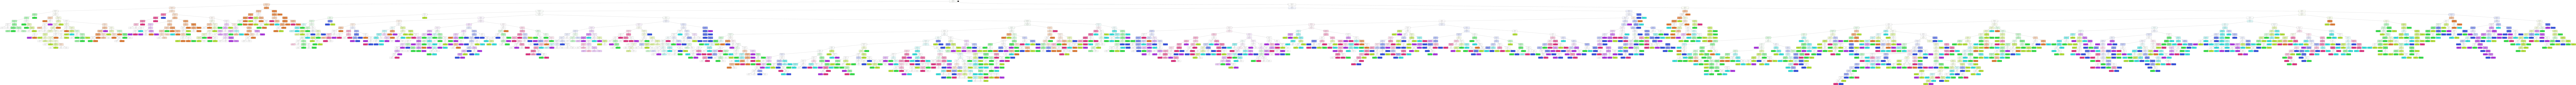

In [18]:
dot_data = StringIO()
export_graphviz(classifier, 
                out_file=dot_data, 
                feature_names=features_cols, 
                filled=True,
                rounded=True,
                special_characters=True,
                class_names=['0','1','2','3','4','5','6','7'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Arbol de decisión - Tipo de Accidente.png')
Image(graph.create_png())

### Conclusión

Como podemos observar en la métrica anterior la puntuación del acierto de este modelo es de 0.28.  
**La precisión** varía significativamente entre las clases, desde un 50% para la clase 0 hasta un 16% para la clase 5. Esto sugiere que el modelo es relativamente mejor al predecir ciertas clases en comparación con otras.  
**El recall** indica al igual que en la precisión que hay una variabilidad notable entre las clases, lo que indica que el modelo tiene diferentes niveles de sensibilidad para detectar cada clase.  
**Los F1-scores** varían de 0.53 para la clase 0 a 0.14 para la clase 5, lo que indica un rendimiento variado del modelo en diferentes clases.  
**El desbalance en el soporte** entre las clases podría ser un factor que afecta el rendimiento del modelo.
Con respecto al resto de modelos comprobados podemos decir que se trata del mejor modelo para el dataset presentado, ya que es el mejor puntuado con la misma configuración de parámetros que el resto de los modelos. Podríamos tener en cuenta que podría ser ampliable el número de registros a utilizar recabando una mayor cantidad de datos y con un mayor balanceo lo que facilitaría el aprendizaje.